## Downloading the dataset of transactions and customer segments from drive. 

In [1]:
!wget -O purchase.csv https://drive.google.com/uc?id=1hyS4UUwZ_KzB91etHegNE4SuWFoTnCX0
!wget -O transactions.csv https://drive.google.com/uc?id=1RzhibJDCZFcQLCeiKl1enCLFL-SOJQX6

--2020-12-10 10:31:36--  https://drive.google.com/uc?id=1hyS4UUwZ_KzB91etHegNE4SuWFoTnCX0
Resolving drive.google.com (drive.google.com)... 216.58.213.14, 2a00:1450:4009:801::200e
Connecting to drive.google.com (drive.google.com)|216.58.213.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/944p7uh2t42pekdv9cp1ar7nkfpn3101/1607596275000/14724987630286451759/*/1hyS4UUwZ_KzB91etHegNE4SuWFoTnCX0 [following]
--2020-12-10 10:31:37--  https://doc-08-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/944p7uh2t42pekdv9cp1ar7nkfpn3101/1607596275000/14724987630286451759/*/1hyS4UUwZ_KzB91etHegNE4SuWFoTnCX0
Resolving doc-08-68-docs.googleusercontent.com (doc-08-68-docs.googleusercontent.com)... 216.58.205.33, 2a00:1450:4009:810::2001
Connecting to doc-08-68-docs.googleusercontent.com (doc-08-68-docs.googleusercontent.com)|216.58.205.33|:443

## Importing the required dependencies for the analysis. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import ttest_ind

In [3]:
customers = pd.read_csv('purchase.csv')
transactions = pd.read_csv('transactions.csv')

# Exploratory Data Analysis

In [4]:
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Let us check the data types of the columns!

In [5]:
transactions.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

We can see that 'DATE' is in int, so first lets change it to datetime format. 

In [6]:
transactions['DATE'] = transactions['DATE'].apply(lambda x: datetime(1899, 12, 30) + timedelta(days=x)) 
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Now, our dataset is looking right! Lets move on to check the statistics for columns.

In [7]:
transactions.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,364,NaN,NaN,NaN,NaN,114,NaN,NaN
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,939,NaN,NaN,NaN,NaN,3304,NaN,NaN
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,NaN,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,NaN,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000


Here, PROD_QTY and TOT_SALES take a huge jump from 2 and 9.2 to 200 and 650 respectively. Worth looking into it. 

In [8]:
print('Product Quantity Unique Values: ', transactions.PROD_QTY.unique(), 'and Sale Amount Unique Values: ' , transactions.TOT_SALES.unique())

Product Quantity Unique Values:  [  2   3   5   1   4 200] and Sale Amount Unique Values:  [  6.     6.3    2.9   15.    13.8    5.1    5.7    3.6    3.9    7.2
  23.     9.2    1.7    3.3    2.1    3.     3.8    5.4    2.7    3.7
  14.8    4.4    6.6    2.6    3.25   4.6    5.8   15.5    7.8    4.2
   7.4    7.6    8.4    6.5    4.3   28.5    7.5    3.4   19.    11.8
  17.6    9.    13.2    1.9   10.2   13.    15.2   11.4   14.5    5.6
  10.8   10.4    1.5   16.5    1.8    5.2    5.9   18.4    8.8   18.5
   6.2    4.8    8.6    2.8    2.3    3.1    2.4   15.6   19.5   27.
   9.9   16.2   13.5   21.6   23.6   29.5   12.6    8.1   15.3   11.1
  22.     9.5   16.25  20.4   11.7   22.8    9.6    8.5   10.5   21.
  12.    14.4    9.75  16.8   25.5   17.7   17.2   17.1    4.5    6.8
  18.    12.9   11.5    8.7   14.    11.6   12.4  650.    21.5    9.3
  11.2    6.9 ]


We can see that the value of 200 and 650 are standing out in the columns PROD_QTY and TOT_SALES respectively, let's see the entries with these values.

In [9]:
transactions[transactions.PROD_QTY == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are only two transactions by the same customer, who is buying this product in bulk maybe for some party or for commercial use. This can be considered an outlier so let us just remove these two entries from our dataset. 

In [10]:
transactions = transactions[transactions.PROD_QTY != 200]
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Carrying on, let's check the product name column just to check we are dealing with only chip transactions here. 

In [11]:
from collections import Counter
Counter(' '.join(transactions['PROD_NAME']).split()).most_common(20)

[('175g', 60561),
 ('Chips', 49770),
 ('150g', 41633),
 ('Kettle', 41288),
 ('&', 35565),
 ('Smiths', 28860),
 ('Salt', 27976),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('134g', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('110g', 22387),
 ('Corn', 22061),
 ('Original', 21560),
 ('Cut', 20754),
 ('Chip', 18645),
 ('170g', 18502),
 ('Salsa', 18094),
 ('Chicken', 15407)]

There are salsa products in our data. So lets remove those. 

In [12]:
transactions = transactions[~transactions.PROD_NAME.str.contains('Salsa')]
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Now proceeding on to the DATE column.

In [13]:
transactions.DATE.nunique()

364

There are only 364 dates present in the dataset, meaning we are missing one day from our year data. 

In [14]:
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(transactions.DATE)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

The date we are missing is 25th December i.e. Christmas. The stores must have been closed that day. Let us plot a graph to see the trend of transactions over the year. 

Text(0.5, 1.0, 'Transactions Trend over the Year')

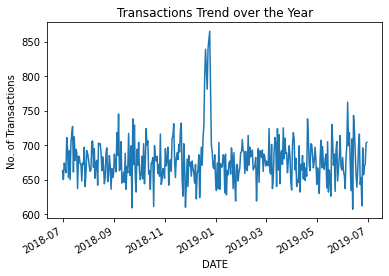

In [15]:
transactions.groupby('DATE').size().plot.line()
plt.ylabel('No. of Transactions')
plt.title('Transactions Trend over the Year')

The transactions increase in the month of December. Lets look more closely. 

Text(0.5, 1.0, 'Transactions Trend in December')

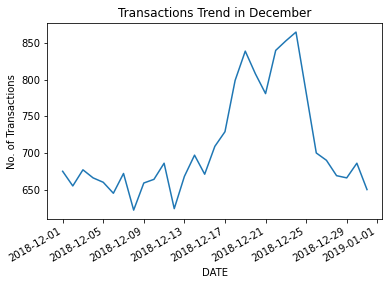

In [16]:
transactions[transactions.DATE.dt.month == 12].groupby('DATE').size().plot.line()
plt.ylabel('No. of Transactions')
plt.title('Transactions Trend in December')

This shows that the sales increase in the days leading up to Christmas! Now, let us move to the customer dataset.

In [17]:
customers

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [18]:
customers.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [19]:
customers.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


So there is no missing data in the customer dataset and all looks good. There are 3 types of customer segments and they can be at 7 different lifestages. 

Proceeding on to merging the two datasets matching the loyalty card number. Also, creating two columns 'BRAND_NAME' and 'PACK_SIZE' having first word and last word of 'PROD_NAME' respectively. 

In [20]:
final_data = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='inner')
BRAND_NAME = final_data['PROD_NAME'].str.partition(' ')[0]
PACK_SIZE = final_data['PROD_NAME'].str[-4:]
final_data['BRAND_NAME'] = BRAND_NAME
final_data['PACK_SIZE'] = PACK_SIZE
final_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175g
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW,160g
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs,175g
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170g
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle,175g
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos,175g
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos,170g
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos,150g


In [21]:
final_data['PROD_NAME'].str.partition(' ')[2].str.split().str[-1]

0         SeaSalt175g
1                175g
2                160g
3                175g
4                170g
             ...     
246735           175g
246736           175g
246737           170g
246738           150g
246739           175g
Name: 2, Length: 246740, dtype: object

<Figure size 1152x576 with 0 Axes>

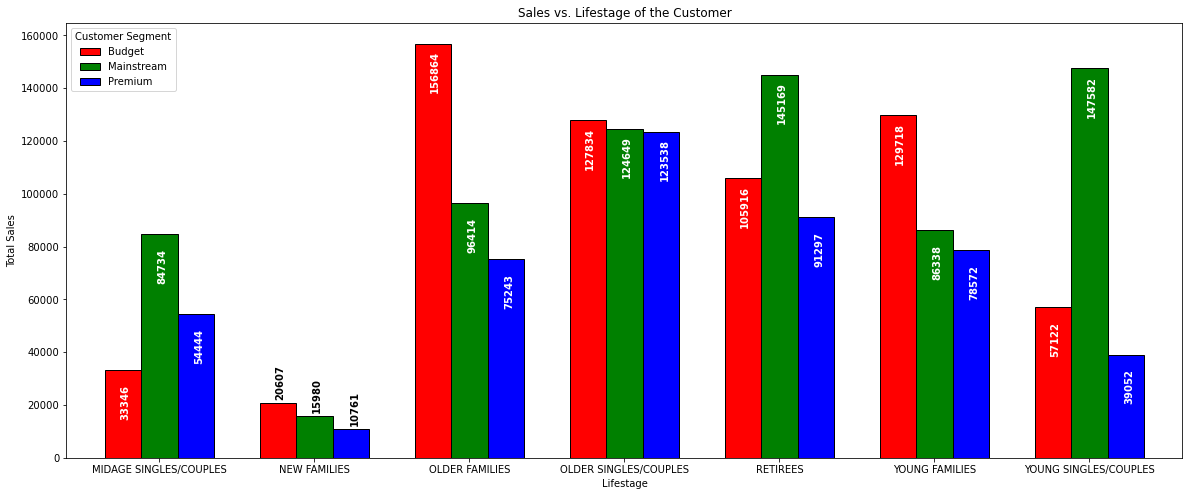

In [22]:
plt.figure(figsize=(16,8))
final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack('PREMIUM_CUSTOMER').plot.bar(color=['r', 'g', 'b'], edgecolor='black', width=0.7)
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.xlabel('Lifestage')
plt.legend(title='Customer Segment')
plt.title('Sales vs. Lifestage of the Customer')

for index, value in enumerate(final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack('PREMIUM_CUSTOMER').values):
    if index == 1:
        plt.annotate(int(round(value[0])), xy=(index - 0.255, value[0] + 2000), color='black', rotation=90, weight='bold')
        plt.annotate(int(round(value[1])), xy=(index - 0.015, value[1] + 2000), color='black', rotation=90, weight='bold')
        plt.annotate(int(round(value[2])), xy=(index + 0.225, value[2] + 2000), color='black', rotation=90, weight='bold')
    else:
        plt.annotate(int(round(value[0])), xy=(index - 0.255, value[0] - 18000), color='white', rotation=90, weight='bold')
        plt.annotate(int(round(value[1])), xy=(index - 0.015, value[1] - 18000), color='white', rotation=90, weight='bold')
        plt.annotate(int(round(value[2])), xy=(index + 0.225, value[2] - 18000), color='white', rotation=90, weight='bold')

We can see from the plot that Budget Older Families, Mainstream Retirees and Mainstream Young Singles/Couples contribute the highest in the sales of chips. Lets explore the reason for this. 

<Figure size 1152x576 with 0 Axes>

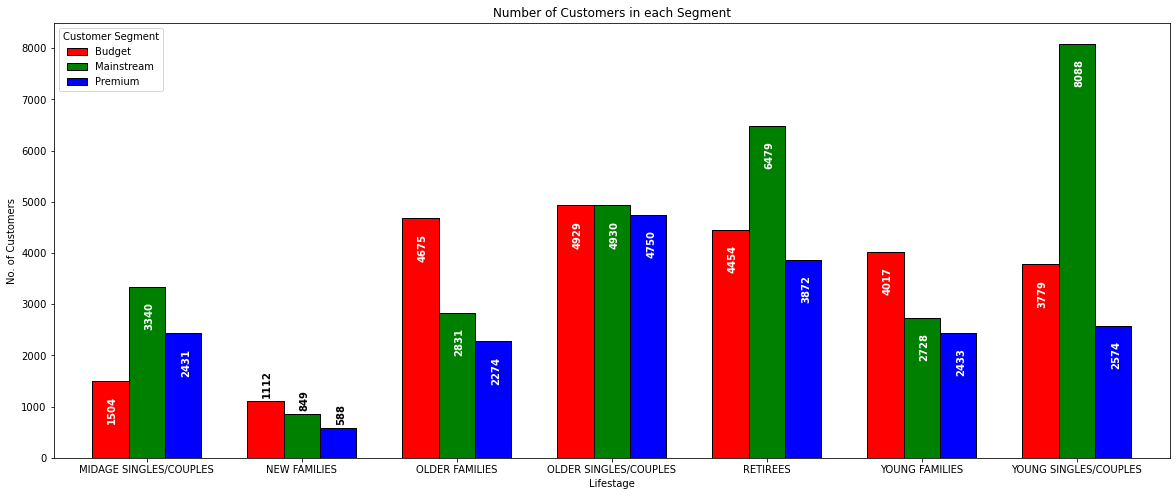

In [23]:
plt.figure(figsize=(16,8))
customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().unstack('PREMIUM_CUSTOMER').plot.bar(color=['r', 'g', 'b'], edgecolor='black', width=0.7)
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation=0)
plt.ylabel('No. of Customers')
plt.xlabel('Lifestage')
plt.legend(title='Customer Segment')
plt.title('Number of Customers in each Segment')

for index, value in enumerate(customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().unstack('PREMIUM_CUSTOMER').values):
    if index == 1:
        plt.annotate(int(round(value[0])), xy=(index - 0.255, value[0] + 100), color='black', rotation=90, weight='bold')
        plt.annotate(int(round(value[1])), xy=(index - 0.015, value[1] + 100), color='black', rotation=90, weight='bold')
        plt.annotate(int(round(value[2])), xy=(index + 0.225, value[2] + 100), color='black', rotation=90, weight='bold')
    else:
        plt.annotate(int(round(value[0])), xy=(index - 0.255, value[0] - 800), color='white', rotation=90, weight='bold')
        plt.annotate(int(round(value[1])), xy=(index - 0.015, value[1] - 800), color='white', rotation=90, weight='bold')
        plt.annotate(int(round(value[2])), xy=(index + 0.225, value[2] - 800), color='white', rotation=90, weight='bold')

From the number of customers in each segment, we can understand the reason behind higher chip sales in Mainstream Retirees and Mainstream Young Singles/Couples is because there are more customers in these segments but Budget Older Families don't show the same pattern. It may be that they buy more packets of chips. Let us plot a graph for that. 

Text(0.5, 1.0, 'Average Number of Units per Customer Segment')

<Figure size 1152x576 with 0 Axes>

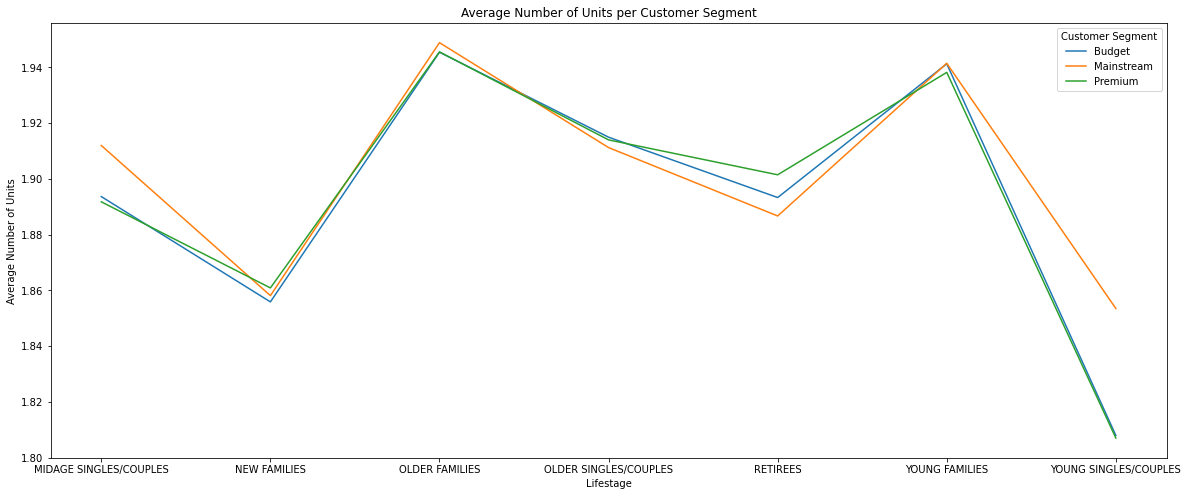

In [24]:
plt.figure(figsize=(16,8))
final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().unstack('PREMIUM_CUSTOMER').plot()
plt.gcf().set_size_inches(20, 8)

plt.ylabel('Average Number of Units')
plt.xlabel('Lifestage')
plt.legend(title='Customer Segment')
plt.title('Average Number of Units per Customer Segment')

Older Families and Young Families purchase more units of chips per transactions. 

Text(0.5, 1.0, 'Average Price per Unit per Customer Segment')

<Figure size 1152x576 with 0 Axes>

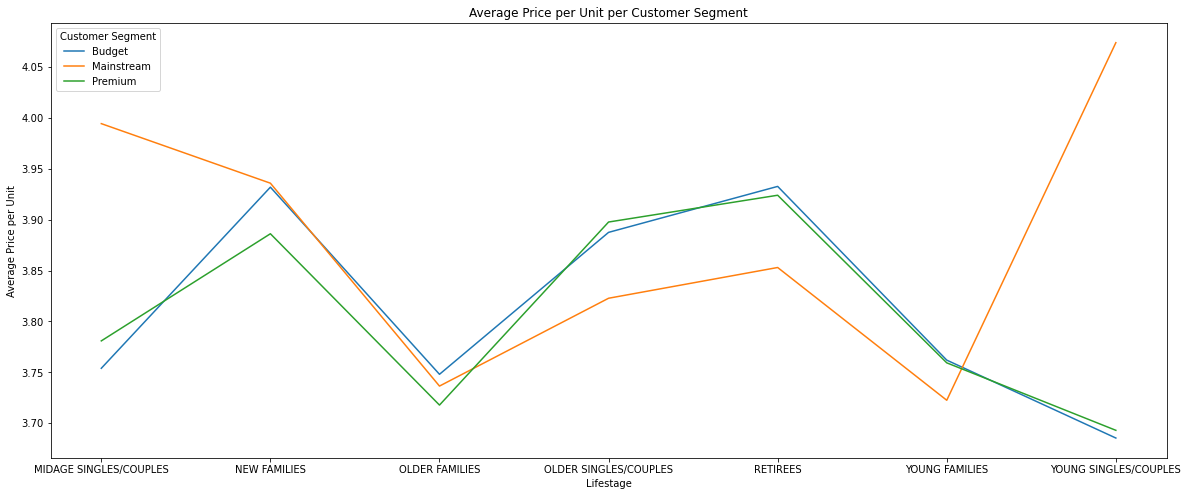

In [25]:
plt.figure(figsize=(16,8))
final_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum().astype(float)).unstack('PREMIUM_CUSTOMER').plot()
plt.gcf().set_size_inches(20, 8)

plt.ylabel('Average Price per Unit')
plt.xlabel('Lifestage')
plt.legend(title='Customer Segment')
plt.title('Average Price per Unit per Customer Segment')

Mainstream Midage and Young Singles/Couples are willing to pay more per chip unit than their budget and premium customers. Premium customers are more likely to buy healthy snacks and when they buy chips, it may be because of parties than for their own consumption. We can see that the difference in average price per packet is not large between the mainstream, premium and the budget midage and yound singles/couples segments. Lets see if it is statistically different.  

In [26]:
print('Independent t-test for unit price between Mainstream YOUNG SINGLES/COUPLES and Premium YOUNG SINGLES/COUPLES Customer Segments:')
print(ttest_ind(final_data.TOT_SALES[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')] 
          / final_data.PROD_QTY[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')]
          , final_data.TOT_SALES[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Premium')] 
          / final_data.PROD_QTY[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Premium')]))

print('Independent t-test for unit price between Mainstream YOUNG SINGLES/COUPLES and Budget YOUNG SINGLES/COUPLES Customer Segments:')
print(ttest_ind(final_data.TOT_SALES[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')] 
          / final_data.PROD_QTY[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')]
          , final_data.TOT_SALES[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Budget')] 
          / final_data.PROD_QTY[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Budget')]))

print('Independent t-test for unit price between Mainstream MIDAGE SINGLES/COUPLES and Premium MIDAGE SINGLES/COUPLES Customer Segments:')
print(ttest_ind(final_data.TOT_SALES[(final_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')] 
          / final_data.PROD_QTY[(final_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')]
          , final_data.TOT_SALES[(final_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Premium')] 
          / final_data.PROD_QTY[(final_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Premium')]))

print('Independent t-test for unit price between Mainstream MIDAGE SINGLES/COUPLES and Budget MIDAGE SINGLES/COUPLES Customer Segments:')
print(ttest_ind(final_data.TOT_SALES[(final_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')] 
          / final_data.PROD_QTY[(final_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')]
          , final_data.TOT_SALES[(final_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Budget')] 
          / final_data.PROD_QTY[(final_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Budget')]))

Independent t-test for unit price between Mainstream YOUNG SINGLES/COUPLES and Premium YOUNG SINGLES/COUPLES Customer Segments:
Ttest_indResult(statistic=26.17657189530865, pvalue=4.667997920183129e-149)
Independent t-test for unit price between Mainstream YOUNG SINGLES/COUPLES and Budget YOUNG SINGLES/COUPLES Customer Segments:
Ttest_indResult(statistic=30.589098703099953, pvalue=3.529712644734283e-202)
Independent t-test for unit price between Mainstream MIDAGE SINGLES/COUPLES and Premium MIDAGE SINGLES/COUPLES Customer Segments:
Ttest_indResult(statistic=14.213565363736285, pvalue=1.3043340153599095e-45)
Independent t-test for unit price between Mainstream MIDAGE SINGLES/COUPLES and Budget MIDAGE SINGLES/COUPLES Customer Segments:
Ttest_indResult(statistic=13.751072106888415, pvalue=8.853602155654677e-43)


The p values are very small for the above t tests, indicating the data did not occur by chance. Also, the t score tells us that the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples. Let us check the most popular chip brands and pack sizes. 

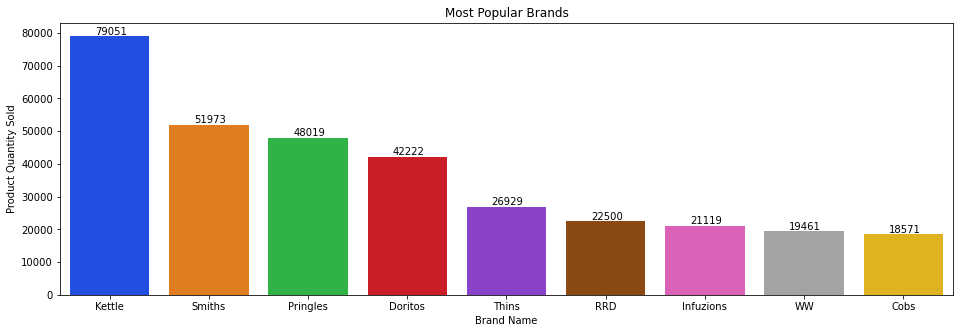

In [27]:
plt.figure(figsize=(16,5))

x = final_data.groupby(['BRAND_NAME'])['PROD_QTY'].sum().nlargest(9).index
y = final_data.groupby(['BRAND_NAME'])['PROD_QTY'].sum().nlargest(9).values

sns.set_palette("bright")
sns.barplot(x, y, order=x)
plt.xlabel('Brand Name')
plt.ylabel('Product Quantity Sold')
plt.title('Most Popular Brands')

for index, value in enumerate(final_data.groupby(['BRAND_NAME'])['PROD_QTY'].sum().nlargest(9).values):
    plt.annotate(value, xy=(index - 0.15, value + 500), color='black')

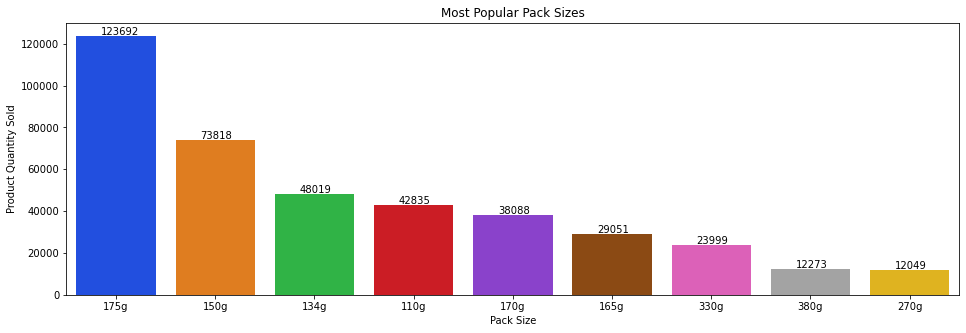

In [28]:
plt.figure(figsize=(16,5))

x = final_data.groupby(['PACK_SIZE'])['PROD_QTY'].sum().nlargest(9).index
y = final_data.groupby(['PACK_SIZE'])['PROD_QTY'].sum().nlargest(9).values

sns.set_palette("bright")
sns.barplot(x, y, order=x)
plt.xlabel('Pack Size')
plt.ylabel('Product Quantity Sold')
plt.title('Most Popular Pack Sizes')

for index, value in enumerate(final_data.groupby(['PACK_SIZE'])['PROD_QTY'].sum().nlargest(9).values):
    plt.annotate(value, xy=(index - 0.15, value + 500), color='black')

We see that Kettle and Smiths are the most popular choice with 175g being the popular pack size. Let's see how this differs from Mainstream YOUNG SINGLES/COUPLES preference. 

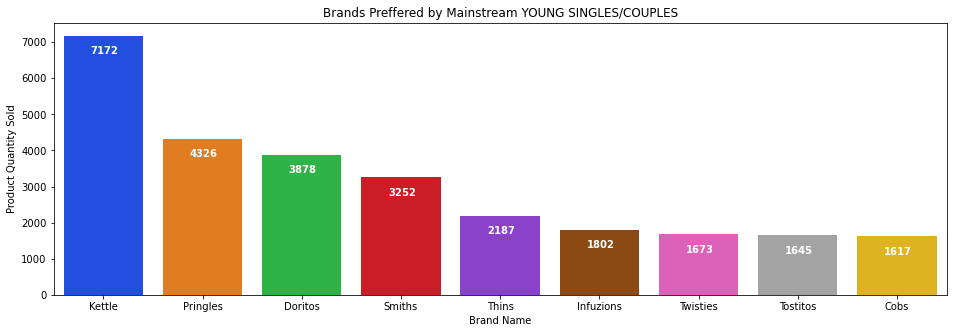

In [29]:
plt.figure(figsize=(16,5))

x = final_data[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')] .groupby(['BRAND_NAME'])['PROD_QTY'].sum().nlargest(9).index
y = final_data[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')].groupby(['BRAND_NAME'])['PROD_QTY'].sum().nlargest(9).values

sns.set_palette("bright")
sns.barplot(x, y, order=x)
plt.xlabel('Brand Name')
plt.ylabel('Product Quantity Sold')
plt.title('Brands Preffered by Mainstream YOUNG SINGLES/COUPLES')

for index, value in enumerate(final_data[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')].groupby(['BRAND_NAME'])['PROD_QTY'].sum().nlargest(9).values):
    plt.annotate(value, xy=(index - 0.13, value - 500), color='white', weight='bold')

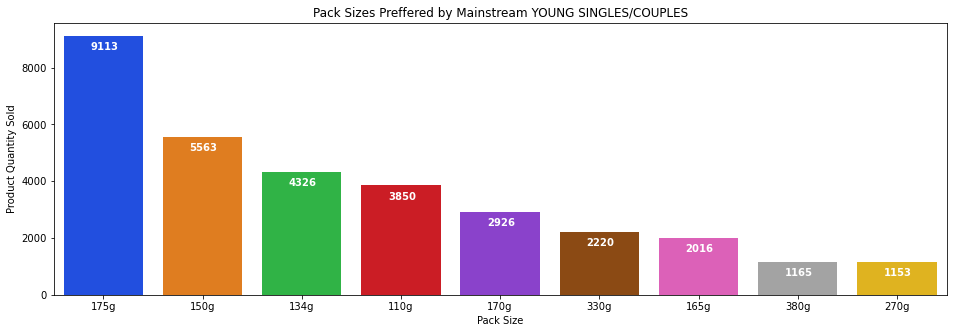

In [30]:
plt.figure(figsize=(16,5))

x = final_data[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')] .groupby(['PACK_SIZE'])['PROD_QTY'].sum().nlargest(9).index
y = final_data[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')].groupby(['PACK_SIZE'])['PROD_QTY'].sum().nlargest(9).values

sns.set_palette("bright")
sns.barplot(x, y, order=x)
plt.xlabel('Pack Size')
plt.ylabel('Product Quantity Sold')
plt.title('Pack Sizes Preffered by Mainstream YOUNG SINGLES/COUPLES')

for index, value in enumerate(final_data[(final_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (final_data.PREMIUM_CUSTOMER == 'Mainstream')].groupby(['PACK_SIZE'])['PROD_QTY'].sum().nlargest(9).values):
    plt.annotate(value, xy=(index - 0.13, value - 500), color='white', weight='bold')

We see that Mainstream YOUNG SINGLES/COUPLES prefer Pringles over Smiths for their second choice after Kettle chips. But Kettle surpasses any other brand by a huge margin. Also, 175g is also the ideal pack size for them similar to other customer segments. Let's analyse the stores now. 

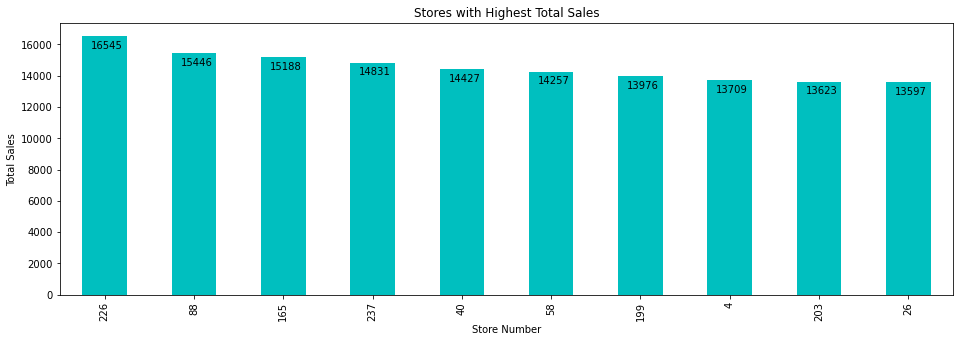

In [31]:
plt.figure(figsize=(16,5))

final_data.groupby(['STORE_NBR'])['TOT_SALES'].sum().nlargest(10).plot.bar(color='c')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Stores with Highest Total Sales')

for index, value in enumerate(final_data.groupby(['STORE_NBR'])['TOT_SALES'].sum().nlargest(10).values):
    plt.annotate(str(round(value)).strip('.0'), xy=(index - 0.15, value - 800), color='black')

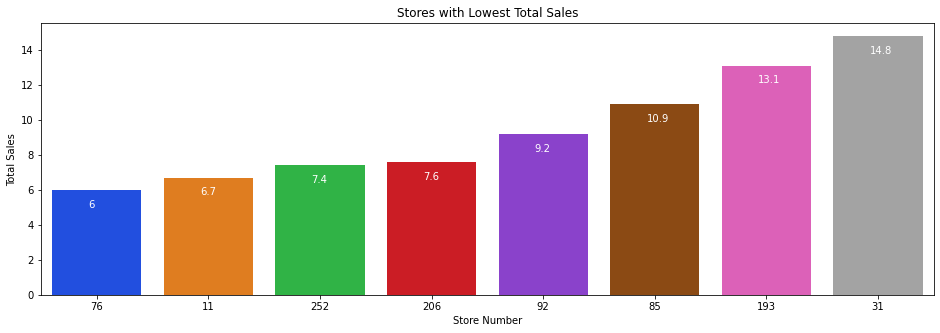

In [32]:
plt.figure(figsize=(16,5))

x = final_data.groupby(['STORE_NBR'])['TOT_SALES'].sum().nsmallest(8).index
y = final_data.groupby(['STORE_NBR'])['TOT_SALES'].sum().nsmallest(8).values

sns.set_palette("bright")
sns.barplot(x, y, order=x)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Stores with Lowest Total Sales')

for index, value in enumerate(final_data.groupby(['STORE_NBR'])['TOT_SALES'].sum().nsmallest(8).values):
    plt.annotate(str(round(value, 1)).strip('.0'), xy=(index - 0.075, value - 1), color='white')

The stores sales surpass 15000 for some stores whereas the sales of chips doesn't even cross 15 for others. So, shelf space can be better used for some other products rather than chips in these stores. 